In [1]:
# importing all necessary libraries to run the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')

In [2]:
data = pd.read_excel("US-BasedCovid19Tweets.xlsx") 
data.head(1)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
1,RT @kahruveldesign: …he wrote on Jan. 23. “My ...,False,0,NaN,2020-05-09 22:25:07,False,NaN,1259248057582940161,NaN,"<a href=""http://twitter.com/download/android"" ...",thinkalot,1,True,False,NaN,NaN


In [14]:
from textblob import TextBlob
t = TextBlob("He is a cheater. i hate him")
t.sentiment 

Sentiment(polarity=-0.8, subjectivity=0.9)

In [3]:
from nltk.corpus import stopwords
#applying pre-processing steps to remove stopwords and words of size less than 2
data['text'] = data['text'].apply(lambda x: x.split())
wordsEng = stopwords.words('english')
data['text'] = data['text'].apply(lambda x:[item for item in x if item not in wordsEng])
data['text'] = data['text'].apply(lambda x: [w for w in x if len(w)>2])
data['text'] = data['text'].apply(lambda x: " ".join(x))
data.head(2)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
1,@kahruveldesign: …he wrote Jan. 23. “My phones...,False,0,NaN,2020-05-09 22:25:07,False,NaN,1259248057582940161,NaN,"<a href=""http://twitter.com/download/android"" ...",thinkalot,1,True,False,NaN,NaN
2,Please Share This Warning. It's Not About Popu...,False,0,NaN,2020-05-09 22:22:13,True,NaN,1259247327904256003,NaN,"<a href=""http://twitter.com/download/iphone"" r...",DRandall,0,False,False,NaN,NaN


In [4]:
data.reset_index(inplace=True)

In [5]:
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')
TEXT=[]
#Rating=[]
for i in range(len(data)):
    #if data['cetagory'][i]=='Racing':
    review = re.sub('[^a-zA-Z]', ' ',data['text'][i])
    #review = re.sub('[/(){}\[\]\|@!,;]', ' ',data['reviews'][i])
    #review = re.sub('[^0-9a-zA-Z #+_♥️]', ' ',data['reviews'][i])#Remove bad symbols
    review = re.sub(r'\d+', '',review)
    review = review.lower()
    review = review.split()

    review = [token for token in review if token not in sw]
    review=' '.join(review)
    TEXT.append(review)
    #Rating.append(data['rating'][i])

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
sid = SentimentIntensityAnalyzer()
NegativeReview=[]
PositiveReview=[]
from textblob import TextBlob
# the variable 'message_text' now contains the text we will analyze.
for i in range(len(data)):   
    #message_text = 'i hate you'

#print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    b = TextBlob(data.text[i])
    #scores = sid.polarity_scores(data.reviews[i])
    value=b.sentiment[0]
    if value<=0:
        NegativeReview.append('Negative')
    else:
        PositiveReview.append('Positive')


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
sid = SentimentIntensityAnalyzer()
Sentiment=[]

from textblob import TextBlob
# the variable 'message_text' now contains the text we will analyze.
for i in range(len(data)):   
    #message_text = 'i hate you'

#print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    b = TextBlob(data.text[i])
    #scores = sid.polarity_scores(data.reviews[i])
    value=b.sentiment[0]
    if value<=0:
        Sentiment.append(0)
    else:
        Sentiment.append(1)


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [8]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout

In [19]:
trX,ttX,trY,ttY = train_test_split(TEXT,Sentiment, test_size = 0.3)

In [20]:
trX = np.array(trX)
trY = np.array(trY)
ttX = np.array(ttX)
ttY = np.array(ttY)


In [21]:
print ('Train samples shape :', trX.shape)
print ('Train labels shape  :', trY.shape)
print ('Test samples shape  :', ttX.shape)
print ('Test labels shape   :', ttY.shape)

Train samples shape : (8300,)
Train labels shape  : (8300,)
Test samples shape  : (3558,)
Test labels shape   : (3558,)


In [22]:
NGRAM_RANGE = (1,1)
TOP_K = 30000
TOKEN_MODE = 'word'
MIN_DOC_FREQ = 2

def ngram_vectorize(train_texts, train_labels, val_texts):
    kwargs = {
        'ngram_range' : NGRAM_RANGE,
        'dtype' : 'int32',
        'strip_accents' : 'unicode',
        'decode_error' : 'replace',
        'analyzer' : TOKEN_MODE,
        'min_df' : MIN_DOC_FREQ,
    }
    
    # Learn Vocab from train texts and vectorize train and val sets
    tfidf_vectorizer = TfidfVectorizer(**kwargs)
    x_train = tfidf_vectorizer.fit_transform(train_texts)
    x_val = tfidf_vectorizer.transform(val_texts)
    
    # Select best k features, with feature importance measured by f_classif
    selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
    selector.fit(x_train, train_labels)
    x_train = selector.transform(x_train).astype('float32')
    x_val = selector.transform(x_val).astype('float32')
    return x_train, x_val

In [23]:
def get_last_layer_units_and_activation(num_classes):
    if num_classes == 2:
        activation = 'sigmoid'
        units = 1
    else:
        activation = 'softmax'
        units = num_classes
    return units, activation

In [34]:
def mlp_model(layers, units, dropout_rate, input_shape, num_classes):
    op_units, op_activation = get_last_layer_units_and_activation(num_classes)
    model = models.Sequential()
    model.add(Dropout(rate=dropout_rate, input_shape=input_shape))
    
    for _ in range(layers-1):
        model.add(Dense(units=units, activation='relu'))
        model.add(Dropout(rate=dropout_rate))
        
    model.add(Dense(units=op_units, activation=op_activation))
    return model

In [41]:
def evaluate_model(trX, trY, ttX, ttY):
    import keras_metrics
    learning_rate=1e-2
    epochs=50
    batch_size=128
    layers=4
    units=200
    dropout_rate=0.5
    num_classes = 2
    # Get the data
    trX, trY, ttX, ttY


    # Vectorize the data
    x_train, x_val = ngram_vectorize(trX, trY, ttX)

    # Create model instance
    model = mlp_model(layers, units=units, dropout_rate=dropout_rate,
                      input_shape=x_train.shape[1:], num_classes=num_classes)

    # Compile model with parameters
    if num_classes == 2:
        loss = 'binary_crossentropy'
    else:
        loss = 'sparse_categorical_crossentropy'
    optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss=loss, metrics=['acc','mae',keras_metrics.precision(), keras_metrics.recall()])

    # Create callback for early stopping on validation loss. If the loss does
    # not decrease on two consecutive tries, stop training
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]
    score=[]
    # Train and validate model
    History = model.fit(x_train, trY, epochs=epochs, validation_data=(x_val, ttY),
                        verbose=2, batch_size=batch_size, callbacks=callbacks)
    score=model.evaluate(x_val,ttY)
    return score

# Print results
#history = History.history
#val_acc = history['val_acc'][-1]
#val_loss = history['val_loss'][-1]
#val_precision=history['val_precision'][-1]
#val_recall=history['val_recall'][-1]
#print ('Validation accuracy: {acc}, loss: {loss}'.format(
#        acc=val_acc, loss=val_loss))
# Plot accuracy
#plt.plot(History.history['acc'])
#plt.plot(History.history['val_acc'])
#plt.title('Model Accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()

# Plot loss
#plt.plot(History.history['loss'])
#plt.plot(History.history['val_loss'])
#plt.title('Model Loss')
#plt.ylabel('Loss')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Validation'], loc='upper right')
#plt.show()


In [42]:
# evaluate model
score=[]
score = evaluate_model(trX, trY, ttX, ttY)
print("Printing Fold " % range(n_folds))
print("Loss: %.5f" %(score[0]))
print("validation accuracy: %.5f" % (score[1]))
print("Precision: %.5f" %(score[3]))
print("Recacll: %.5f" %(score[4]))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 8300 samples, validate on 3558 samples
Epoch 1/50
 - 12s - loss: 0.4491 - acc: 0.7888 - mean_absolute_error: 0.2901 - precision: 0.7723 - recall: 0.4909 - val_loss: 0.2848 - val_acc: 0.8806 - val_mean_absolute_error: 0.2035 - val_precision: 0.9666 - val_recall: 0.6641
Epoch 2/50
 - 6s - loss: 0.2937 - acc: 0.8796 - mean_absolute_error: 0.1799 - precision: 0.8794 - recall: 0.7432 - val_loss: 0.2300 - val_acc: 0.9089 - val_mean_absolute_error: 0.1547 - val_precision: 0.9397 - val_recall: 0.7743
Epoch 3/50
 - 4s - loss: 0.2437 - acc: 0.9041 - mean_absolute_error: 0.1452 - precision: 0.9083 - recall: 0.7967 - val_loss: 0.2137 - val_acc: 0.9157 - val_mean_absolute_error: 0.1325 - val_precision: 0.9372 - val_recall: 0.7986
Epoch 4/50
 - 4s - loss: 0.2285 - acc: 0.9139 - mean_absolute_error: 0.1326 - precision: 0.9054 - recall: 0.8318 - val_loss: 0.2197 - val_acc: 0.9112 - val_mean_absolute_error: 0.1383 - val_precision: 0.9488 - val_recall: 0.7745
Epoch 5/50
 - 4s - loss: 0.2178 - a

In [26]:
n_folds = 10
cv_scores, model_history,precision,recall = list(), list(),list(), list()
for _ in range(n_folds):
    trX,ttX,trY,ttY = train_test_split(TEXT,Sentiment, test_size = 0.3)
    trX = np.array(trX)
    trY = np.array(trY)
    ttX = np.array(ttX)
    ttY = np.array(ttY)

    # evaluate model
    score=[]
    score = evaluate_model(trX, trY, ttX, ttY)
    print("Printing Fold " % range(n_folds))
    print("Loss: %.5f" %(score[0]))
    print("validation accuracy: %.5f" % (score[1]))
    print("Precision: %.5f" %(score[3]))
    print("Recacll: %.5f" %(score[4]))
    cv_scores.append(score[1])
    precision.append(score[3])
    recall.append(score[4])
    #model_history.append(model)
    
print('Estimated Accuracy %.3f (%.3f)' % (np.mean(cv_scores), np.std(cv_scores)))
print('Estimated Precision %.3f (%.3f)' % (np.mean(precision), np.std(precision)))
print('Estimated Recall %.3f (%.3f)' % (np.mean(recall), np.std(recall)))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 8300 samples, validate on 3558 samples
Epoch 1/10
 - 9s - loss: 0.5634 - acc: 0.6952 - mean_absolute_error: 0.3991 - precision: 0.3130 - recall: 0.0978 - val_loss: 0.3919 - val_acc: 0.8612 - val_mean_absolute_error: 0.2743 - val_precision: 0.9771 - val_recall: 0.5972
Epoch 2/10
 - 3s - loss: 0.2616 - acc: 0.9116 - mean_absolute_error: 0.1731 - precision: 0.9091 - recall: 0.8233 - val_loss: 0.2422 - val_acc: 0.9098 - val_mean_absolute_error: 0.1213 - val_precision: 0.9221 - val_recall: 0.7977
Epoch 3/10
 - 2s - loss: 0.1350 - acc: 0.9496 - mean_absolute_error: 0.0814 - precision: 0.9347 - recall: 0.9146 - val_loss: 0.2595 - val_acc: 0.9120 - val_mean_absolute_error: 0.1062 - val_precision: 0.9355 - val_recall: 0.7922
Epoch 4/10
 - 2s - loss: 0.0946 - acc: 0.9652 - mean_absolute_error: 0.0549 - precision: 0.9528 - recall: 0.9444 - val_loss: 0.2538 - val_acc: 0.9129 - val_mean_absolute_error: 0.1028 - val_precision: 0.9022 - val_recall: 0.8299
3558/3558 [=========================

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 8300 samples, validate on 3558 samples
Epoch 1/10
 - 8s - loss: 0.5553 - acc: 0.7051 - mean_absolute_error: 0.3939 - precision: 0.3758 - recall: 0.1251 - val_loss: 0.3850 - val_acc: 0.8465 - val_mean_absolute_error: 0.2706 - val_precision: 0.9692 - val_recall: 0.5704
Epoch 2/10
 - 2s - loss: 0.2449 - acc: 0.9136 - mean_absolute_error: 0.1607 - precision: 0.9053 - recall: 0.8275 - val_loss: 0.2324 - val_acc: 0.9036 - val_mean_absolute_error: 0.1371 - val_precision: 0.8465 - val_recall: 0.8806
Epoch 3/10
 - 3s - loss: 0.1253 - acc: 0.9511 - mean_absolute_error: 0.0769 - precision: 0.9377 - recall: 0.9152 - val_loss: 0.2337 - val_acc: 0.9120 - val_mean_absolute_error: 0.1097 - val_precision: 0.8909 - val_recall: 0.8489
Epoch 4/10
 - 2s - loss: 0.0913 - acc: 0.9676 - mean_absolute_error: 0.0537 - precision: 0.9586 - recall: 0.9448 - val_loss: 0.2523 - val_acc: 0.9117 - val_mean_absolute_error: 0.1030 - val_precision: 0.8997 - val_recall: 0.8356
3558/3558 [=========================

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 8300 samples, validate on 3558 samples
Epoch 1/10
 - 8s - loss: 0.5549 - acc: 0.7157 - mean_absolute_error: 0.3976 - precision: 0.5167 - recall: 0.1858 - val_loss: 0.3444 - val_acc: 0.8547 - val_mean_absolute_error: 0.2357 - val_precision: 0.9391 - val_recall: 0.5988
Epoch 2/10
 - 3s - loss: 0.2327 - acc: 0.9108 - mean_absolute_error: 0.1453 - precision: 0.9030 - recall: 0.8275 - val_loss: 0.2338 - val_acc: 0.9092 - val_mean_absolute_error: 0.1311 - val_precision: 0.8996 - val_recall: 0.8184
Epoch 3/10
 - 2s - loss: 0.1306 - acc: 0.9508 - mean_absolute_error: 0.0789 - precision: 0.9395 - recall: 0.9145 - val_loss: 0.2331 - val_acc: 0.9106 - val_mean_absolute_error: 0.1113 - val_precision: 0.8959 - val_recall: 0.8286
Epoch 4/10
 - 2s - loss: 0.0987 - acc: 0.9616 - mean_absolute_error: 0.0578 - precision: 0.9498 - recall: 0.9363 - val_loss: 0.2587 - val_acc: 0.9120 - val_mean_absolute_error: 0.1032 - val_precision: 0.9144 - val_recall: 0.8128
Epoch 5/10
 - 2s - loss: 0.0791 - ac

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 8300 samples, validate on 3558 samples
Epoch 1/10
 - 9s - loss: 0.5557 - acc: 0.7255 - mean_absolute_error: 0.3985 - precision: 0.7324 - recall: 0.2144 - val_loss: 0.3191 - val_acc: 0.8640 - val_mean_absolute_error: 0.2225 - val_precision: 0.9469 - val_recall: 0.6357
Epoch 2/10
 - 3s - loss: 0.2265 - acc: 0.9113 - mean_absolute_error: 0.1413 - precision: 0.8994 - recall: 0.8254 - val_loss: 0.2166 - val_acc: 0.9132 - val_mean_absolute_error: 0.1207 - val_precision: 0.9108 - val_recall: 0.8245
Epoch 3/10
 - 3s - loss: 0.1256 - acc: 0.9539 - mean_absolute_error: 0.0763 - precision: 0.9449 - recall: 0.9151 - val_loss: 0.2157 - val_acc: 0.9151 - val_mean_absolute_error: 0.1048 - val_precision: 0.8896 - val_recall: 0.8565
Epoch 4/10
 - 3s - loss: 0.0948 - acc: 0.9649 - mean_absolute_error: 0.0559 - precision: 0.9538 - recall: 0.9406 - val_loss: 0.2278 - val_acc: 0.9106 - val_mean_absolute_error: 0.1026 - val_precision: 0.8745 - val_recall: 0.8615
Epoch 5/10
 - 3s - loss: 0.0759 - ac

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 8300 samples, validate on 3558 samples
Epoch 1/10
 - 9s - loss: 0.5708 - acc: 0.6845 - mean_absolute_error: 0.4070 - precision: 0.3307 - recall: 0.0829 - val_loss: 0.3953 - val_acc: 0.8305 - val_mean_absolute_error: 0.2753 - val_precision: 0.9825 - val_recall: 0.4939
Epoch 2/10
 - 3s - loss: 0.2753 - acc: 0.9012 - mean_absolute_error: 0.1820 - precision: 0.9071 - recall: 0.7925 - val_loss: 0.2142 - val_acc: 0.9165 - val_mean_absolute_error: 0.1295 - val_precision: 0.8741 - val_recall: 0.8716
Epoch 3/10
 - 2s - loss: 0.1331 - acc: 0.9511 - mean_absolute_error: 0.0807 - precision: 0.9342 - recall: 0.9190 - val_loss: 0.2214 - val_acc: 0.9160 - val_mean_absolute_error: 0.1068 - val_precision: 0.8623 - val_recall: 0.8830
Epoch 4/10
 - 2s - loss: 0.0965 - acc: 0.9634 - mean_absolute_error: 0.0563 - precision: 0.9532 - recall: 0.9390 - val_loss: 0.2288 - val_acc: 0.9168 - val_mean_absolute_error: 0.0968 - val_precision: 0.8721 - val_recall: 0.8733
3558/3558 [=========================

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 8300 samples, validate on 3558 samples
Epoch 1/10
 - 9s - loss: 0.5634 - acc: 0.7065 - mean_absolute_error: 0.4023 - precision: 0.4532 - recall: 0.1599 - val_loss: 0.3602 - val_acc: 0.8505 - val_mean_absolute_error: 0.2489 - val_precision: 0.9580 - val_recall: 0.5806
Epoch 2/10
 - 4s - loss: 0.2325 - acc: 0.9099 - mean_absolute_error: 0.1492 - precision: 0.9036 - recall: 0.8196 - val_loss: 0.2213 - val_acc: 0.9101 - val_mean_absolute_error: 0.1225 - val_precision: 0.8928 - val_recall: 0.8324
Epoch 3/10
 - 3s - loss: 0.1317 - acc: 0.9504 - mean_absolute_error: 0.0784 - precision: 0.9410 - recall: 0.9111 - val_loss: 0.2255 - val_acc: 0.9103 - val_mean_absolute_error: 0.1080 - val_precision: 0.8853 - val_recall: 0.8424
Epoch 4/10
 - 2s - loss: 0.0978 - acc: 0.9641 - mean_absolute_error: 0.0579 - precision: 0.9515 - recall: 0.9405 - val_loss: 0.2490 - val_acc: 0.9162 - val_mean_absolute_error: 0.1002 - val_precision: 0.9042 - val_recall: 0.8386
3558/3558 [=========================

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 8300 samples, validate on 3558 samples
Epoch 1/10
 - 9s - loss: 0.5663 - acc: 0.7076 - mean_absolute_error: 0.4065 - precision: 0.5068 - recall: 0.1944 - val_loss: 0.3391 - val_acc: 0.8544 - val_mean_absolute_error: 0.2316 - val_precision: 0.9674 - val_recall: 0.5748
Epoch 2/10
 - 4s - loss: 0.2310 - acc: 0.9106 - mean_absolute_error: 0.1460 - precision: 0.9035 - recall: 0.8274 - val_loss: 0.2236 - val_acc: 0.9137 - val_mean_absolute_error: 0.1175 - val_precision: 0.9361 - val_recall: 0.7912
Epoch 3/10
 - 3s - loss: 0.1283 - acc: 0.9533 - mean_absolute_error: 0.0769 - precision: 0.9489 - recall: 0.9123 - val_loss: 0.2138 - val_acc: 0.9193 - val_mean_absolute_error: 0.1008 - val_precision: 0.9081 - val_recall: 0.8405
Epoch 4/10
 - 2s - loss: 0.0929 - acc: 0.9654 - mean_absolute_error: 0.0543 - precision: 0.9567 - recall: 0.9400 - val_loss: 0.2206 - val_acc: 0.9199 - val_mean_absolute_error: 0.0976 - val_precision: 0.8857 - val_recall: 0.8689
Epoch 5/10
 - 2s - loss: 0.0768 - ac

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 8300 samples, validate on 3558 samples
Epoch 1/10
 - 9s - loss: 0.5654 - acc: 0.6970 - mean_absolute_error: 0.4017 - precision: 0.3677 - recall: 0.1122 - val_loss: 0.3798 - val_acc: 0.8569 - val_mean_absolute_error: 0.2720 - val_precision: 0.9513 - val_recall: 0.6005
Epoch 2/10
 - 3s - loss: 0.2505 - acc: 0.9123 - mean_absolute_error: 0.1643 - precision: 0.9142 - recall: 0.8220 - val_loss: 0.2200 - val_acc: 0.9098 - val_mean_absolute_error: 0.1286 - val_precision: 0.8623 - val_recall: 0.8685
Epoch 3/10
 - 2s - loss: 0.1297 - acc: 0.9501 - mean_absolute_error: 0.0780 - precision: 0.9392 - recall: 0.9111 - val_loss: 0.2136 - val_acc: 0.9154 - val_mean_absolute_error: 0.1071 - val_precision: 0.8740 - val_recall: 0.8710
Epoch 4/10
 - 2s - loss: 0.0973 - acc: 0.9633 - mean_absolute_error: 0.0574 - precision: 0.9514 - recall: 0.9393 - val_loss: 0.2218 - val_acc: 0.9174 - val_mean_absolute_error: 0.0972 - val_precision: 0.8803 - val_recall: 0.8711
Epoch 5/10
 - 2s - loss: 0.0731 - ac

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 8300 samples, validate on 3558 samples
Epoch 1/10
 - 9s - loss: 0.5675 - acc: 0.7005 - mean_absolute_error: 0.4058 - precision: 0.3730 - recall: 0.1309 - val_loss: 0.3672 - val_acc: 0.8654 - val_mean_absolute_error: 0.2596 - val_precision: 0.9597 - val_recall: 0.6242
Epoch 2/10
 - 4s - loss: 0.2374 - acc: 0.9104 - mean_absolute_error: 0.1528 - precision: 0.9038 - recall: 0.8235 - val_loss: 0.2167 - val_acc: 0.9160 - val_mean_absolute_error: 0.1176 - val_precision: 0.9078 - val_recall: 0.8382
Epoch 3/10
 - 3s - loss: 0.1223 - acc: 0.9542 - mean_absolute_error: 0.0737 - precision: 0.9403 - recall: 0.9222 - val_loss: 0.2138 - val_acc: 0.9148 - val_mean_absolute_error: 0.1061 - val_precision: 0.8749 - val_recall: 0.8738
Epoch 4/10
 - 2s - loss: 0.0937 - acc: 0.9631 - mean_absolute_error: 0.0563 - precision: 0.9515 - recall: 0.9377 - val_loss: 0.2218 - val_acc: 0.9191 - val_mean_absolute_error: 0.0959 - val_precision: 0.8937 - val_recall: 0.8631
Epoch 5/10
 - 2s - loss: 0.0807 - ac

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 8300 samples, validate on 3558 samples
Epoch 1/10
 - 9s - loss: 0.5607 - acc: 0.7120 - mean_absolute_error: 0.4015 - precision: 0.4716 - recall: 0.1757 - val_loss: 0.3289 - val_acc: 0.8811 - val_mean_absolute_error: 0.2408 - val_precision: 0.9259 - val_recall: 0.7006
Epoch 2/10
 - 5s - loss: 0.2309 - acc: 0.9113 - mean_absolute_error: 0.1451 - precision: 0.8981 - recall: 0.8344 - val_loss: 0.2136 - val_acc: 0.9154 - val_mean_absolute_error: 0.1193 - val_precision: 0.8827 - val_recall: 0.8587
Epoch 3/10
 - 3s - loss: 0.1270 - acc: 0.9535 - mean_absolute_error: 0.0762 - precision: 0.9441 - recall: 0.9166 - val_loss: 0.2161 - val_acc: 0.9160 - val_mean_absolute_error: 0.1028 - val_precision: 0.8733 - val_recall: 0.8719
Epoch 4/10
 - 2s - loss: 0.0953 - acc: 0.9661 - mean_absolute_error: 0.0559 - precision: 0.9618 - recall: 0.9384 - val_loss: 0.2512 - val_acc: 0.9073 - val_mean_absolute_error: 0.1075 - val_precision: 0.8375 - val_recall: 0.8920
3558/3558 [=========================

In [7]:
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding,GlobalMaxPooling1D
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')

Using TensorFlow backend.


In [8]:
#converting twitterSentiment[] list into dataframe for serving it to keras tokenizer
dataSetFinal = pd.DataFrame(np.array(TEXT))
dataSetFinal.head(2)

,0
0,kahruveldesign wrote jan phones ringing need g...
1,please share warning popularity https co wbycg...


In [9]:
dataSentiment = pd.DataFrame(np.array(Sentiment))
dataSentiment.head(2)

,0
0,0
1,0


In [10]:
tokenizer = tensorflow.keras.preprocessing.text.Tokenizer(num_words=2500, lower=True,split=' ',filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(dataSetFinal[0].values)
#print(tokenizer.word_index)  # To see the dicstionary
X = tokenizer.texts_to_sequences(dataSetFinal[0].values)
X = tensorflow.keras.preprocessing.sequence.pad_sequences(X)

In [49]:
from keras import optimizers
#Deep Learning Network Structure
model_conv = Sequential()
model_conv.add(Embedding(2500,100, input_length=X.shape[1]))
#model_conv.add(Dropout(0.5))
#model_conv.add(Conv1D(64, 5, activation='relu'))
#model_conv.add(MaxPooling1D(pool_size=4))
model_conv.add(LSTM(100))
model_conv.add(Dropout(0.5))
model_conv.add(Dense(100, activation='relu'))
model_conv.add(Dropout(0.5))
model_conv.add(Dense(50, activation='relu'))
model_conv.add(Dropout(0.2))
model_conv.add(Dense(2, activation='softmax'))
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_conv.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy','mae','mse',keras_metrics.precision(), keras_metrics.recall()])
model_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 23, 100)           250000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
__________

In [11]:
from keras import optimizers
from keras import regularizers
from keras import backend as K
weight_decay = 1e-4
#Deep Learning Network Structure
model = Sequential()
model.add(Embedding(2500,100, input_length=X.shape[1]))
model.add(Conv1D(64, 5, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 5, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dense(2, activation='softmax'))
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy','mae','mse',keras_metrics.precision(), keras_metrics.recall()])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 23, 100)           250000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 23, 64)            32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 11, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 11, 64)            20544     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
__________

In [50]:
#LSTM
batch_size=64
Y = pd.get_dummies(dataSentiment[0]).values
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size = 0.30)
#Here we train the Network.
pred=model_conv.fit(X_train, Y_train, batch_size =batch_size, epochs =50, verbose =2,validation_data=(X_valid,Y_valid))
pred

Train on 8300 samples, validate on 3558 samples
Epoch 1/50
 - 16s - loss: 0.6446 - acc: 0.6573 - mean_absolute_error: 0.4532 - mean_squared_error: 0.2261 - precision: 0.6617 - recall: 0.9878 - val_loss: 0.6335 - val_acc: 0.6684 - val_mean_absolute_error: 0.4399 - val_mean_squared_error: 0.2209 - val_precision: 0.6684 - val_recall: 1.0000
Epoch 2/50
 - 8s - loss: 0.6355 - acc: 0.6624 - mean_absolute_error: 0.4442 - mean_squared_error: 0.2219 - precision: 0.6624 - recall: 1.0000 - val_loss: 0.6285 - val_acc: 0.6684 - val_mean_absolute_error: 0.4482 - val_mean_squared_error: 0.2185 - val_precision: 0.6684 - val_recall: 1.0000
Epoch 3/50
 - 8s - loss: 0.6268 - acc: 0.6636 - mean_absolute_error: 0.4400 - mean_squared_error: 0.2179 - precision: 0.6632 - recall: 1.0000 - val_loss: 0.6143 - val_acc: 0.6684 - val_mean_absolute_error: 0.4469 - val_mean_squared_error: 0.2117 - val_precision: 0.6684 - val_recall: 1.0000
Epoch 4/50
 - 8s - loss: 0.5968 - acc: 0.6946 - mean_absolute_error: 0.4172 - 

Epoch 29/50
 - 8s - loss: 0.0775 - acc: 0.9799 - mean_absolute_error: 0.0352 - mean_squared_error: 0.0175 - precision: 0.9774 - recall: 0.9925 - val_loss: 0.3094 - val_acc: 0.9289 - val_mean_absolute_error: 0.0790 - val_mean_squared_error: 0.0654 - val_precision: 0.9265 - val_recall: 0.9706
Epoch 30/50
 - 9s - loss: 0.0691 - acc: 0.9820 - mean_absolute_error: 0.0335 - mean_squared_error: 0.0156 - precision: 0.9811 - recall: 0.9920 - val_loss: 0.3143 - val_acc: 0.9219 - val_mean_absolute_error: 0.0828 - val_mean_squared_error: 0.0679 - val_precision: 0.9300 - val_recall: 0.9550
Epoch 31/50
 - 9s - loss: 0.0668 - acc: 0.9837 - mean_absolute_error: 0.0305 - mean_squared_error: 0.0145 - precision: 0.9815 - recall: 0.9942 - val_loss: 0.3801 - val_acc: 0.9157 - val_mean_absolute_error: 0.0955 - val_mean_squared_error: 0.0756 - val_precision: 0.9448 - val_recall: 0.9281
Epoch 32/50
 - 9s - loss: 0.0691 - acc: 0.9825 - mean_absolute_error: 0.0325 - mean_squared_error: 0.0153 - precision: 0.981

In [51]:
#LSTM
score=[]
score=model_conv.evaluate(X_valid,Y_valid,verbose=2,batch_size=batch_size)
#keras.metrics.binary_accuracy(Y_valid,pred)
print("score: %.2f" %(score[0]))
print("validation accuracy: %.2f" % (score[1]))
print("Precision: %.2f" %(score[4]))
print("Recacll: %.2f" %(score[5]))
print("Mean Absolute Error: %.2f" % (score[2]))
print("Mean Squared Error: %.2f" % (score[3]))

score: 0.39
validation accuracy: 0.92
Precision: 0.93
Recacll: 0.96
Mean Absolute Error: 0.08
Mean Squared Error: 0.07


In [ ]:
#CNN
batch_size=64
Y = pd.get_dummies(dataSentiment[0]).values
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size = 0.30)
#Here we train the Network.
pred=model.fit(X_train, Y_train, batch_size =batch_size, epochs =50, verbose =2,validation_data=(X_valid,Y_valid))
pred

Train on 8300 samples, validate on 3558 samples
Epoch 1/50


In [9]:
print(len(NegativeReview))
print(len(PositiveReview))

7876
3982


In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
sid = SentimentIntensityAnalyzer()
NegativeReviewSentimentIntensityAnalyzer=[]
PositiveReviewSentimentIntensityAnalyzer=[]
from textblob import TextBlob
# the variable 'message_text' now contains the text we will analyze.
for i in range(len(data)):   
    #message_text = 'i hate you'

#print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    b = sid.polarity_scores(data.text[i])
    #scores = sid.polarity_scores(data.reviews[i])
    value=b['compound']
    if value<=0:
        NegativeReviewSentimentIntensityAnalyzer.append('Negative')
    else:
        PositiveReviewSentimentIntensityAnalyzer.append('Positive')


In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
sid = SentimentIntensityAnalyzer()
SentimentIntensity=[]
# the variable 'message_text' now contains the text we will analyze.
for i in range(len(data)):   
    #message_text = 'i hate you'

#print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    b = sid.polarity_scores(data.text[i])
    #scores = sid.polarity_scores(data.reviews[i])
    value=b['compound']
    if value<=0:
        SentimentIntensity.append('Negative')
    else:
        SentimentIntensity.append('Positive')


In [17]:
print(len(NegativeReviewSentimentIntensityAnalyzer))
print(len(PositiveReviewSentimentIntensityAnalyzer))

8889
2969


In [32]:
y = SentimentIntensity
X = TEXT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)


In [19]:
y = Sentiment
X = TEXT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)


In [36]:
y = SentimentIntensity
X = TEXT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)


In [27]:
y = Sentiment
X = TEXT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)


In [21]:
#TF-IDF TextBlob
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
clf= LogisticRegression()
gnb = BernoulliNB()
preds = rfc.fit(X_train, y_train).predict(X_test)
predsGB = gb.fit(X_train, y_train).predict(X_test)
predsLR = clf.fit(X_train, y_train).predict(X_test)
predsGNB = gnb.fit(X_train, y_train).predict(X_test)
predsETC = etc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print("Extra Tree")
print(accuracy_score(y_test, predsETC))
print("GBM")
print(accuracy_score(y_test, predsGB))
print("LR")
print(accuracy_score(y_test, predsLR))
print("NB")
print(accuracy_score(y_test, predsGNB))


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Random Forest
0.9198988195615514
Extra Tree
0.947442383361439
GBM
0.8653738055087128
LR
0.8991006183249016
NB
0.8892636312535133


In [33]:
#TF-IDF Sentiment Intensity
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
clf= LogisticRegression()
gnb = BernoulliNB()
preds = rfc.fit(X_train, y_train).predict(X_test)
predsGB = gb.fit(X_train, y_train).predict(X_test)
predsLR = clf.fit(X_train, y_train).predict(X_test)
predsGNB = gnb.fit(X_train, y_train).predict(X_test)
predsETC = etc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print("Extra Tree")
print(accuracy_score(y_test, predsETC))
print("GBM")
print(accuracy_score(y_test, predsGB))
print("LR")
print(accuracy_score(y_test, predsLR))
print("NB")
print(accuracy_score(y_test, predsGNB))


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Random Forest
0.8974142776840922
Extra Tree
0.9305789769533446
GBM
0.852726250702642
LR
0.8839235525576167
NB
0.8875772906127037


In [28]:
#COuntVectorizer TextBlob
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
clf= LogisticRegression()
gnb = BernoulliNB()
preds = rfc.fit(X_train, y_train).predict(X_test)
predsGB = gb.fit(X_train, y_train).predict(X_test)
predsLR = clf.fit(X_train, y_train).predict(X_test)
predsGNB = gnb.fit(X_train, y_train).predict(X_test)
predsETC = etc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print("Extra Tree")
print(accuracy_score(y_test, predsETC))
print("GBM")
print(accuracy_score(y_test, predsGB))
print("LR")
print(accuracy_score(y_test, predsLR))
print("NB")
print(accuracy_score(y_test, predsGNB))


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Random Forest
0.925238898257448
Extra Tree
0.9406970207982013
GBM
0.8603147835862844
LR
0.9249578414839797
NB
0.8788645306351883


In [37]:
#COuntVectorizer Intensity
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
clf= LogisticRegression()
gnb = BernoulliNB()
preds = rfc.fit(X_train, y_train).predict(X_test)
predsGB = gb.fit(X_train, y_train).predict(X_test)
predsLR = clf.fit(X_train, y_train).predict(X_test)
predsGNB = gnb.fit(X_train, y_train).predict(X_test)
predsETC = etc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print("Extra Tree")
print(accuracy_score(y_test, predsETC))
print("GBM")
print(accuracy_score(y_test, predsGB))
print("LR")
print(accuracy_score(y_test, predsLR))
print("NB")
print(accuracy_score(y_test, predsGNB))


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Random Forest
0.9131534569983136
Extra Tree
0.927487352445194
GBM
0.8532883642495784
LR
0.9168071950534008
NB
0.883080382237212


In [29]:
#count Vectorizer TextBlob
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
print("Stochastic Gradient Classifier")
clf = SGDClassifier(max_iter=1100, tol=1e-3)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='isotonic')
predSGD=calibrated_clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predSGD))

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = SGDClassifier(max_iter=1100, tol=1e-3)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('sgd', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

Stochastic Gradient Classifier
0.9378864530635188
Voting Classifier LR+SGD


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.924114671163575


In [38]:
#count Vectorizer Intensity
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
print("Stochastic Gradient Classifier")
clf = SGDClassifier(max_iter=1100, tol=1e-3)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='isotonic')
predSGD=calibrated_clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predSGD))

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = SGDClassifier(max_iter=1100, tol=1e-3)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('sgd', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

Stochastic Gradient Classifier
0.9238336143901068
Voting Classifier LR+SGD


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.918212478920742


In [22]:
#TF-IDF TextBlob
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
print("Stochastic Gradient Classifier")
clf = SGDClassifier(max_iter=1100, tol=1e-3)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='isotonic')
predSGD=calibrated_clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predSGD))

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = SGDClassifier(max_iter=1100, tol=1e-3)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('sgd', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

Stochastic Gradient Classifier
0.9401349072512648
Voting Classifier LR+SGD


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9002248454187746


In [34]:
#TF-IDF Sentiment Intensity
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
print("Stochastic Gradient Classifier")
clf = SGDClassifier(max_iter=1100, tol=1e-3)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='isotonic')
predSGD=calibrated_clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predSGD))

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = SGDClassifier(max_iter=1100, tol=1e-3)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('sgd', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

Stochastic Gradient Classifier
0.9243957279370433
Voting Classifier LR+SGD


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.883080382237212


In [26]:
#TF-IDF TextBlob
print("GBM")
print(classification_report(y_test,predsGB))
print("GNB")
print(classification_report(y_test,predsGNB))
print("ETC")
print(classification_report(y_test,predsETC))
print("LR")
print(classification_report(y_test,predsLR))
print("SGD")
print(classification_report(y_test,predSGD))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))
print("Random Forest")
print(classification_report(y_test,preds))


GBM
              precision    recall  f1-score   support

    Negative       0.84      0.99      0.91      2359
    Positive       0.96      0.63      0.76      1199

    accuracy                           0.87      3558
   macro avg       0.90      0.81      0.83      3558
weighted avg       0.88      0.87      0.86      3558

GNB
              precision    recall  f1-score   support

    Negative       0.87      0.98      0.92      2359
    Positive       0.94      0.72      0.81      1199

    accuracy                           0.89      3558
   macro avg       0.91      0.85      0.87      3558
weighted avg       0.89      0.89      0.88      3558

ETC
              precision    recall  f1-score   support

    Negative       0.94      0.98      0.96      2359
    Positive       0.96      0.88      0.92      1199

    accuracy                           0.95      3558
   macro avg       0.95      0.93      0.94      3558
weighted avg       0.95      0.95      0.95      3558

LR
    

In [35]:
#TF-IDF Sentiment Intensity
print("GBM")
print(classification_report(y_test,predsGB))
print("GNB")
print(classification_report(y_test,predsGNB))
print("ETC")
print(classification_report(y_test,predsETC))
print("LR")
print(classification_report(y_test,predsLR))
print("SGD")
print(classification_report(y_test,predSGD))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))
print("Random Forest")
print(classification_report(y_test,preds))


GBM
              precision    recall  f1-score   support

    Negative       0.84      0.99      0.91      2687
    Positive       0.91      0.44      0.60       871

    accuracy                           0.85      3558
   macro avg       0.88      0.71      0.75      3558
weighted avg       0.86      0.85      0.83      3558

GNB
              precision    recall  f1-score   support

    Negative       0.88      0.98      0.93      2687
    Positive       0.92      0.60      0.72       871

    accuracy                           0.89      3558
   macro avg       0.90      0.79      0.83      3558
weighted avg       0.89      0.89      0.88      3558

ETC
              precision    recall  f1-score   support

    Negative       0.94      0.97      0.95      2687
    Positive       0.91      0.80      0.85       871

    accuracy                           0.93      3558
   macro avg       0.92      0.88      0.90      3558
weighted avg       0.93      0.93      0.93      3558

LR
    

In [30]:
#count Vectorizer TextBlob
print("GBM")
print(classification_report(y_test,predsGB))
print("GNB")
print(classification_report(y_test,predsGNB))
print("ETC")
print(classification_report(y_test,predsETC))
print("LR")
print(classification_report(y_test,predsLR))
print("SGD")
print(classification_report(y_test,predSGD))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))
print("Random Forest")
print(classification_report(y_test,preds))


GBM
              precision    recall  f1-score   support

    Negative       0.83      0.99      0.90      2361
    Positive       0.96      0.61      0.75      1197

    accuracy                           0.86      3558
   macro avg       0.90      0.80      0.83      3558
weighted avg       0.88      0.86      0.85      3558

GNB
              precision    recall  f1-score   support

    Negative       0.86      0.97      0.91      2361
    Positive       0.93      0.69      0.79      1197

    accuracy                           0.88      3558
   macro avg       0.90      0.83      0.85      3558
weighted avg       0.88      0.88      0.87      3558

ETC
              precision    recall  f1-score   support

    Negative       0.94      0.98      0.96      2361
    Positive       0.95      0.87      0.91      1197

    accuracy                           0.94      3558
   macro avg       0.94      0.92      0.93      3558
weighted avg       0.94      0.94      0.94      3558

LR
    

In [39]:
#count Vectorizer Intensity
print("GBM")
print(classification_report(y_test,predsGB))
print("GNB")
print(classification_report(y_test,predsGNB))
print("ETC")
print(classification_report(y_test,predsETC))
print("LR")
print(classification_report(y_test,predsLR))
print("SGD")
print(classification_report(y_test,predSGD))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))
print("Random Forest")
print(classification_report(y_test,preds))


GBM
              precision    recall  f1-score   support

    Negative       0.85      0.99      0.91      2683
    Positive       0.91      0.45      0.60       875

    accuracy                           0.85      3558
   macro avg       0.88      0.72      0.76      3558
weighted avg       0.86      0.85      0.83      3558

GNB
              precision    recall  f1-score   support

    Negative       0.88      0.98      0.93      2683
    Positive       0.90      0.59      0.71       875

    accuracy                           0.88      3558
   macro avg       0.89      0.79      0.82      3558
weighted avg       0.88      0.88      0.87      3558

ETC
              precision    recall  f1-score   support

    Negative       0.93      0.97      0.95      2683
    Positive       0.91      0.78      0.84       875

    accuracy                           0.93      3558
   macro avg       0.92      0.88      0.90      3558
weighted avg       0.93      0.93      0.93      3558

LR
    

In [80]:
count=0
values=0
for i in range(len(data)):
    if data['app_id'][i]=='com.ffgames.racingincar2':
        values=values+1
        #print(data['rating'][i])
        count =count+data['rating'][i]
print(count/values)
print(values)
print(count)

3.875892857142857
4480
17364


In [72]:
CommunicationSentiment=[]
CommunicationSentiment=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[1]:
            CommunicationSentiment.append(data['reviews'][i])
            CommunicationSentiment.append(data['rating'][i])
y =CommunicationSentiment
X=CommunicationSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.6301111111111111
             precision    recall  f1-score   support

          1       0.52      0.72      0.60      1704
          2       0.33      0.02      0.04       640
          3       0.33      0.05      0.08       829
          4       0.34      0.03      0.06      1177
          5       0.68      0.94      0.79      4650

avg / total       0.55      0.63      0.54      9000



In [79]:
ActionSentiment=[]
ActionRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[2]:
            ActionSentiment.append(data['reviews'][i])
            ActionRating.append(data['rating'][i])
y =ActionRating
X=ActionSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.7051272370308842
             precision    recall  f1-score   support

          1       0.68      0.45      0.54      1583
          2       0.33      0.02      0.04       377
          3       0.35      0.06      0.10       925
          4       0.30      0.03      0.05      1589
          5       0.72      0.97      0.83      8769

avg / total       0.63      0.71      0.63     13243



In [80]:
ArcadeSentiment=[]
ArcadeRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[3]:
            ArcadeSentiment.append(data['reviews'][i])
            ArcadeRating.append(data['rating'][i])
y =ArcadeRating
X=ArcadeSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.7430884999182071
             precision    recall  f1-score   support

          1       0.64      0.26      0.37       660
          2       0.32      0.03      0.06       230
          3       0.34      0.08      0.13       739
          4       0.35      0.04      0.08      1612
          5       0.76      0.98      0.85      8985

avg / total       0.67      0.74      0.67     12226



In [83]:
CasualSentiment=[]
CasualRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[4]:
            CasualSentiment.append(data['reviews'][i])
            CasualRating.append(data['rating'][i])
y =CasualRating
X=CasualSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.6899759422614274
             precision    recall  f1-score   support

          1       0.52      0.49      0.50       591
          2       0.20      0.01      0.02       199
          3       0.33      0.05      0.08       459
          4       0.31      0.04      0.07       891
          5       0.72      0.97      0.83      4095

avg / total       0.60      0.69      0.61      6235



In [84]:
WeatherSentiment=[]
WeatherRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[5]:
            WeatherSentiment.append(data['reviews'][i])
            WeatherRating.append(data['rating'][i])
y =WeatherRating
X=WeatherSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.6679677970236643
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.58      0.32      0.41       594
          2       0.26      0.03      0.05       314
          3       0.28      0.06      0.09       516
          4       0.37      0.10      0.16      1493
          5       0.70      0.97      0.81      5281

avg / total       0.58      0.67      0.59      8198



C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.



In [85]:
category

array(['Sports', 'Communication', 'action', 'Arcade',
       'Video Players & Editors', 'Weather', 'card', 'photography',
       'Shopping', 'Health & Fitness', 'Finance', 'Casual', 'Medical',
       'Racing'], dtype=object)

In [86]:
CardSentiment=[]
CardRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[6]:
            CardSentiment.append(data['reviews'][i])
            CardRating.append(data['rating'][i])
y =CardRating
X=CardSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.7016246805403432
             precision    recall  f1-score   support

          1       0.59      0.38      0.46      1008
          2       0.41      0.02      0.04       378
          3       0.40      0.05      0.09       708
          4       0.35      0.04      0.07      1521
          5       0.72      0.98      0.83      7341

avg / total       0.62      0.70      0.61     10956



In [87]:
PhotoSentiment=[]
PhotoRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[7]:
            PhotoSentiment.append(data['reviews'][i])
            PhotoRating.append(data['rating'][i])
y =PhotoRating
X=PhotoSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.728925353925354
             precision    recall  f1-score   support

          1       0.54      0.60      0.57      1006
          2       0.38      0.05      0.09       422
          3       0.41      0.11      0.17       830
          4       0.38      0.04      0.07      1679
          5       0.76      0.98      0.86      8495

avg / total       0.66      0.73      0.65     12432



In [88]:
ShoppingSentiment=[]
ShoppingRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[8]:
            ShoppingSentiment.append(data['reviews'][i])
            ShoppingRating.append(data['rating'][i])
y =ShoppingRating
X=ShoppingSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.699623745819398
             precision    recall  f1-score   support

          1       0.66      0.71      0.69      2716
          2       0.42      0.01      0.03       548
          3       0.43      0.06      0.11       901
          4       0.51      0.06      0.11      1856
          5       0.72      0.95      0.82      8331

avg / total       0.65      0.70      0.63     14352



In [89]:
HealthSentiment=[]
HealthRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[9]:
            HealthSentiment.append(data['reviews'][i])
            HealthRating.append(data['rating'][i])
y =HealthRating
X=HealthSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.8116222760290557
             precision    recall  f1-score   support

          1       0.48      0.06      0.10       238
          2       0.00      0.00      0.00       151
          3       0.15      0.01      0.01       341
          4       0.17      0.01      0.01      1197
          5       0.82      1.00      0.90      8398

avg / total       0.70      0.81      0.73     10325



C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [90]:
FinanceSentiment=[]
FinanceRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[10]:
            FinanceSentiment.append(data['reviews'][i])
            FinanceRating.append(data['rating'][i])
y =FinanceRating
X=FinanceSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.6387904559414127
             precision    recall  f1-score   support

          1       0.55      0.77      0.64      1802
          2       0.20      0.01      0.02       367
          3       0.21      0.01      0.02       591
          4       0.40      0.06      0.10      1214
          5       0.69      0.88      0.77      4492

avg / total       0.56      0.64      0.56      8466



In [91]:
CasualSentiment=[]
CasualRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[11]:
            CasualSentiment.append(data['reviews'][i])
            CasualRating.append(data['rating'][i])
y =CasualRating
X=CasualSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.7534246575342466
             precision    recall  f1-score   support

          1       0.57      0.19      0.29       818
          2       0.06      0.00      0.00       390
          3       0.40      0.07      0.12       943
          4       0.32      0.03      0.06      1832
          5       0.77      0.98      0.86     11785

avg / total       0.66      0.75      0.67     15768



In [92]:
MedicalSentiment=[]
MedicalRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[12]:
            MedicalSentiment.append(data['reviews'][i])
            MedicalRating.append(data['rating'][i])
y =MedicalRating
X=MedicalSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.7704485488126649
             precision    recall  f1-score   support

          1       0.61      0.32      0.42       222
          2       0.14      0.01      0.02        96
          3       0.45      0.04      0.07       241
          4       0.44      0.06      0.10      1149
          5       0.78      0.98      0.87      5493

avg / total       0.70      0.77      0.70      7201



In [93]:
RacingSentiment=[]
RacingRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[13]:
            RacingSentiment.append(data['reviews'][i])
            RacingRating.append(data['rating'][i])
y =RacingRating
X=RacingSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.7408776344762504
             precision    recall  f1-score   support

          1       0.67      0.42      0.52       955
          2       0.39      0.03      0.05       275
          3       0.37      0.09      0.14       757
          4       0.42      0.04      0.08      1631
          5       0.75      0.98      0.85      9098

avg / total       0.67      0.74      0.67     12716



In [5]:
counterCategory=[]
total=[]
count=0
category=data.cetagory.unique()
for j in range(len(category)):
    
    for i in range(len(data)):
        if data['cetagory'][i]==category[j]:
            count+=1
    total.append(count)
    count=0
print(total)    

[32280, 30000, 44141, 40751, 20781, 27324, 36520, 41440, 47840, 34415, 28220, 52560, 24002, 42384]


In [6]:
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
number_of_apps_in_category = data['cetagory'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')

KeyError: 'cetagory'

In [14]:
details=data[data['app_name'].str.contains("Snooker")]

TypeError: list indices must be integers or slices, not str

In [6]:
data.head(5)

,cetagory,app_name,app_id,reviews,rating
0,Sports,Billiards City,com.billiards.city.pool.nation.club,"Wonderfull App. Completed all 1020 levels, Ca...",5
1,Sports,Billiards City,com.billiards.city.pool.nation.club,"It's good, I like the gameplay. Please change...",4
2,Sports,Billiards City,com.billiards.city.pool.nation.club,I really enjoyed this game until I saw one of...,1
3,Sports,Billiards City,com.billiards.city.pool.nation.club,PLEASE!!! Get rid of the odd shaped tables an...,1
4,Sports,Billiards City,com.billiards.city.pool.nation.club,"Very easy game to play, and has actually give...",4


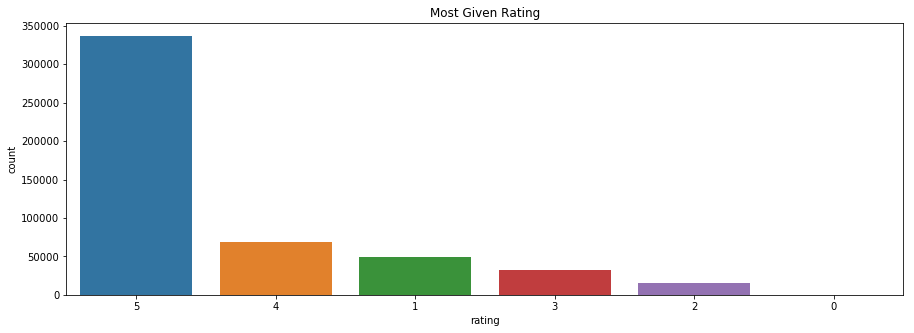

In [26]:
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
y = data.rating
fig, ax = pyplot.subplots(figsize=(15,5))
ax.set_title("Most Given Rating")
ax = sns.countplot(y,label="Rating Count",ax=ax,order=data.rating.value_counts().iloc[:10].index)  

In [4]:
from nltk.corpus import sentiwordnet as swn

In [35]:
import nltk
a=swn.senti_synset('unhappy.a.3')

In [118]:
from imblearn.under_sampling import RandomUnderSampler

ImportError: cannot import name '_astype_copy_false'

In [27]:
STOPWORDS = set(stopwords.words('english'))
appsentiments=[]
for i in range(len(data)):
        if data['app_id'][i]=='com.vectorunit.purple.googleplay':
            review = re.sub('[^a-zA-Z]', ' ',data['reviews'][i])
            review = re.sub('[/(){}\[\]\|@!,;]', ' ',data['reviews'][i])
            review = re.sub('[^0-9a-zA-Z #+_♥️]', ' ',data['reviews'][i])#Remove bad symbols
            review = re.sub(r'\d+', '',review)
            review = review.lower()
            review = review.split()

            review = [token for token in review if token not in STOPWORDS]
            review=' '.join(review)
            appsentiments.append(review)

In [24]:
count=0
values=0
for i in range(len(data)):
    if data['app_id'][i]=='com.vectorunit.purple.googleplay':
        values=values+1
        #print(data['rating'][i])
        count =count+data['rating'][i]
print(count/values)

4.618973214285714


In [37]:
values

4480

In [94]:
STOPWORDS = set(stopwords.words('english'))
Reviews=[]
for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ',data['reviews'][i])
    review = re.sub('[/(){}\[\]\|@!,;]', ' ',data['reviews'][i])
    review = re.sub('[^0-9a-zA-Z #+_♥️]', ' ',data['reviews'][i])#Remove bad symbols
    review = re.sub(r'\d+', '',review)
    review = review.lower()
    review = review.split()

    review = [token for token in review if token not in STOPWORDS]
    review=' '.join(review)
    Reviews.append(review)

In [7]:
Reviews

['wonderfull app completed levels wait levels level bug get around complete touching two ballt lower left side rail let hand pick wise disappear rail great game loved',
 'good like gameplay please change music gets repetitive nd level hear track loop start way many ads also please make mode could break balls instead always levels shoot random balls',
 'really enjoyed game saw one adverts throughout ngame man woman spooning hardly appropriate young nchildren see want play innocent game pool nreally todays day age children exposed things ni deleting game hope find one innocence nmind',
 'please get rid odd shaped tables go back classic table please fix level balls cue stick disappear table making impossible continue otherwise great game disappointing unable continue end',
 'easy game play actually given pointers play nreal game pool like hit cue ball angle place nthe cue stick complaint really ninstructions say acquiring hearts coins points',
 'going lie started playing game probably hou

In [36]:
y = data['rating']
X=Reviews
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=72684)
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(Reviews)

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [20]:
X_test.shape

(4480, 72684)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=50)
model = rfc.fit(X_train, y_train)
#print("Random Forest")
#print(accuracy_score(y_test, preds))

In [12]:
type(model)

sklearn.ensemble.forest.RandomForestClassifier

In [15]:
import pickle
filename = 'finalized_model.csv'
pickle.dump(model, open(filename, 'wb'))

PermissionError: [Errno 13] Permission denied: 'finalized_model.csv'

In [30]:
import pickle as cPickle
with open('predict.csv', 'wb') as f:
    cPickle.dump(model, f)

NameError: name 'model' is not defined

In [31]:
import pickle as cPickle
with open('C:\\Users\\Muhammad Umer\\PycharmProjects\\GooglePlayStore\\predict.csv', 'rb') as f:
    rf = cPickle.load(f)


preds = rf.predict(X_test)
#print("Random Forest")
#print(accuracy_score(y_test, preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.19.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


NameError: name 'X_test' is not defined

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=72684)
X_test=vectorizer.transform(Reviews)
pred = rf.predict(X_test)
print("Random Forest")
print(pred)

NotFittedError: TfidfVectorizer - Vocabulary wasn't fitted.

In [4]:
sum(pred)/len(appsentiments)

NameError: name 'pred' is not defined

In [7]:
print( len(data['cetagory'].unique()) , "categories")

print("\n", data['cetagory'].unique())

14 categories

 ['Sports' 'Communication' 'action' 'Arcade' 'Video Players & Editors'
 'Weather' 'card' 'photography' 'Shopping' 'Health & Fitness' 'Finance'
 'Casual' 'Medical' 'Racing']


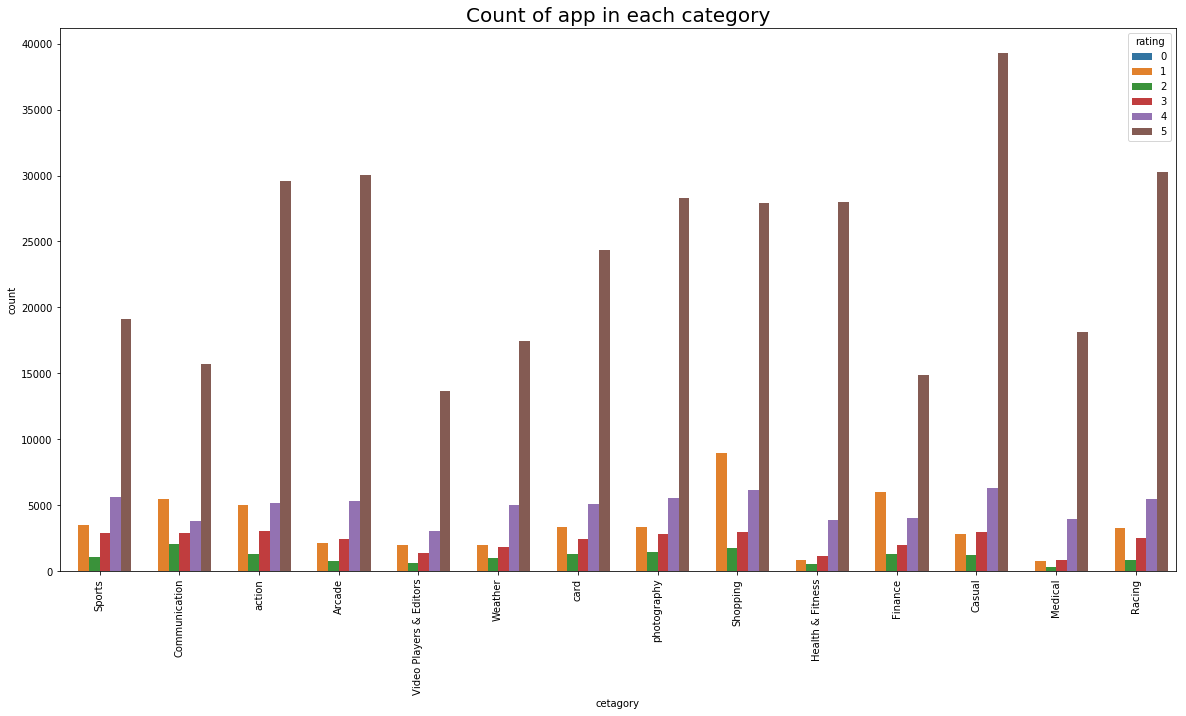

In [36]:
import seaborn as sns
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
from matplotlib import pyplot
import plotly.graph_objs as go
%matplotlib inline
fig, ax = pyplot.subplots(figsize=(20,10))
g = sns.countplot(x="cetagory",data=data, hue=data.rating)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Count of app in each category',size = 20)
plt.savefig('Count of app in each categorys.png')

In [13]:
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
number_of_apps_in_category = data['cetagory'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')

In [27]:
# first, we import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()
sentimentScore=[]
# the variable 'message_text' now contains the text we will analyze.
for i in range(len(appsentiments)):    
    message_text = appsentiments[i]

#print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    scores = sid.polarity_scores(message_text)
    sentimentScore.append(scores['compound'])
# Here we loop through the keys contained in scores (pos, neu, neg, and compound scores) and print the key-value pairs on the screen

#print(scores['compound'])

In [14]:
scores = sid.polarity_scores('I am bad boy')
scores['compound']

-0.5423

In [35]:
sum(sentimentScore)/len(appsentiments)

0.46316624999999484

In [102]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
biasedReview=[]
Newrating=[]
biasedRating=[]
#rat=[]
count=0
# the variable 'message_text' now contains the text we will analyze.
for i in range(len(data)):   
    #message_text = 'i hate you'

#print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    b = TextBlob(data.reviews[i])
    #scores = sid.polarity_scores(data.reviews[i])
    value=b.sentiment[0]
    #value=scores['neg']
    rat=data.rating[i]
    if value<=0 and rat >2.5:
        count=count+1
        biasedReview.append(data.reviews[i])
        biasedRating.append(rat)
    else:
        Newrating.append(rat)
print(count)

124238


In [78]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
biasedReview=[]
Newrating=[]
biasedRating=[]
#rat=[]
count=0
# the variable 'message_text' now contains the text we will analyze.
for i in range(len(data)):   
    #message_text = 'i hate you'

#print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    b = TextBlob(data.reviews[i])
    #scores = sid.polarity_scores(data.reviews[i])
    value=b.sentiment[0]
    #value=scores['neg']
    rat=data.rating[i]
    if value<=0 and rat >2.5:
        count=count+1
        biasedReview.append(data.reviews[i])
        biasedRating.append(rat)
    else:
        Newrating.append(rat)
print(count)

124238


In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
biasedReview=[]
Newrating=[]
biasedRating=[]
#rat=[]
from textblob import TextBlob
count=0
# the variable 'message_text' now contains the text we will analyze.
for i in range(len(data)):   
    #message_text = 'i hate you'

#print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    b = TextBlob(data.reviews[i])
    #scores = sid.polarity_scores(data.reviews[i])
    value=b.sentiment[0]
    #value=scores['neg']
    rat=data.rating[i]
    if value<=0 and rat >=2:
        count=count+1
        biasedReview.append(data.reviews[i])
        biasedRating.append(rat)
    else:
        Newrating.append(rat)
print(count)

134079


In [70]:
df = pd.DataFrame(biasedRating)
#The game cheats and way too many advertisemen

In [25]:
dfWithTwoRating = pd.DataFrame(
    {'biasedRating': biasedRating,
     'biasedReview': biasedReview
     
    })


In [28]:
dfWithTwoRating.biasedRating.value_counts()

5    89034
4    20479
3    14725
2     9841
Name: biasedRating, dtype: int64

In [29]:
dfWithTwoRating.biasedRating.count()

134079

In [30]:
dfWithTwoRatingNew = pd.DataFrame(
    {'Newrating': Newrating
     
    })
dfWithTwoRatingNew.Newrating.value_counts()

5    247747
1     49608
4     47940
3     17513
2      5764
0         7
Name: Newrating, dtype: int64

In [75]:
data.rating.value_counts()

5    336781
4     68419
1     49608
3     32238
2     15605
0         7
Name: rating, dtype: int64

In [113]:
df = pd.DataFrame(
    {'biasedRating': biasedRating,
     'biasedReview': biasedReview
     
    })
df.head(2)

,biasedRating,biasedReview
0,4,"Very easy game to play, and has actually give..."
1,5,I'm not going to lie.I just started playing t...


In [116]:
df.to_csv(r'BiasedDataset.csv')


In [114]:
#df.to_csv(r'BiasedDataset.csv')
df.biasedRating.value_counts()

5    89034
4    20479
3    14725
Name: biasedRating, dtype: int64

In [117]:
df1 = pd.DataFrame(
    {'NewRating': Newrating
     
    })
df1.head(2)
df1.to_csv(r'BiasedDatasetNewRating.csv')

In [86]:
df1.NewRating.value_counts()

5    247747
1     49608
4     47940
3     17513
2     15605
0         7
Name: NewRating, dtype: int64

In [94]:
len(biasedReview)

124238

In [101]:
biasedRating.count(2)

0

In [48]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentimentScore=[]
#rat=[]
count=0
# the variable 'message_text' now contains the text we will analyze.
for i in range(len(data)):   
    #message_text = 'i hate you'

#print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    b = TextBlob(data.reviews[i])
    #scores = sid.polarity_scores(data.reviews[i])
    value=b.sentiment[0]
    #value=scores['neg']
    rat=data.rating[i]
    if value<=0 and rat > 2.5:
        count=count+1
print(count)

124238


In [ ]:
for i in range(len(data)): 
    if data.cetagory=='Sports':
        sportsReviews.append(data.re)

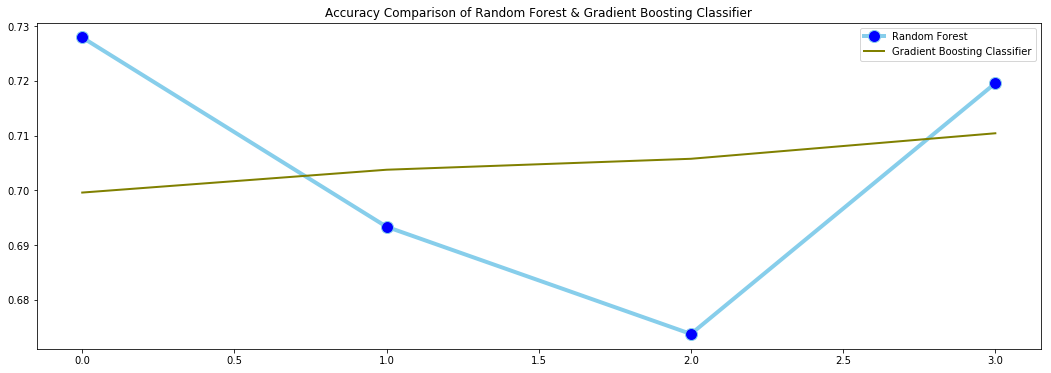

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
x1=[0.72791,0.69333,0.67375,0.71955]
x2=[0.69958,0.70375,0.70575,0.71041]
# Data
df=pd.DataFrame({'x': range(0,4), 'Random Forest': x1, 'Gradient Boosting Classifier': x2})

# multiple line plot
fig, ax = plt.subplots(figsize=(18,6))
ax.set_title("Accuracy Comparison of Random Forest & Gradient Boosting Classifier")
plt.plot( 'x', 'Random Forest', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'Gradient Boosting Classifier', data=df, marker='', color='olive', linewidth=2)
plt.legend()

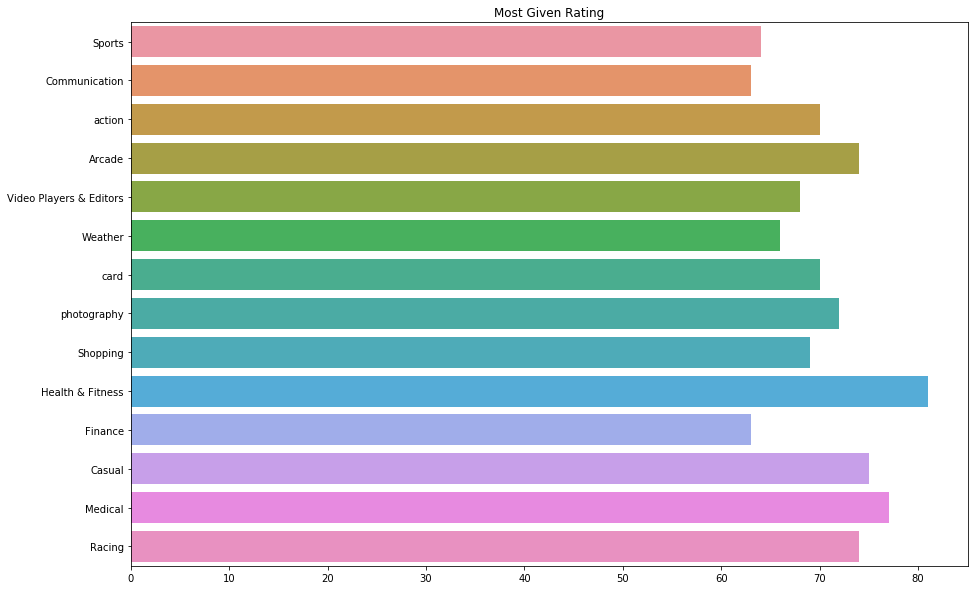

In [58]:
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
#x=category
ylist =[64,63,70,74,68,66,70,72,69,81,63,75,77,74]
fig, ax = pyplot.subplots(figsize=(15,10))
ax.set_title("Most Given Rating")
ax = sns.barplot(y=category, x=ylist,ax=ax)  

In [29]:
category=data.cetagory.unique()

In [82]:
textS='It is great my kids love to play it. Thank you for having this game on game store.'
textS=textS.lower()

In [83]:
cleaned=re.sub(r"(?is)<(script|style).*?>.*?(</\1>)", "", textS.strip())
cleaned =re.sub(r"(?s)<!--(.*?)-->[\n]?", "", cleaned)
cleaned = re.sub(r"(?s)<.*?>", " ", cleaned)

In [84]:
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
tokens = word_tokenize(cleaned)
result = [i for i in tokens if not i in stop_words]
review=' '.join(result)
review

'great kids love play . thank game game store .'

In [87]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer= PorterStemmer()
final=[]
input_str=word_tokenize(review)
for word in input_str:
    final.append(stemmer.stem(word))
finals=' '.join(final)
finals

'great kid love play . thank game game store .'

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv1 = TfidfVectorizer()
x_traincv = cv1.fit_transform(["great kid love play . thank game game store ."])
x_traincv_df = pd.DataFrame(x_traincv.toarray(),columns=list(cv1.get_feature_names()))
x_traincv_df

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


,game,great,kid,love,play,store,thank
0,0.632456,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228
